In [1]:
from image_proces import ImagePreprocessor
from datapreprocessor import DataPreprocessor

import numpy as np

In [2]:
# Khởi tạo một thể hiện của lớp DataPreprocessor
data_preprocessor = DataPreprocessor()
# Gọi phương thức load_data để tải dữ liệu từ thư mục 'dataset'
X_test, Y_test = data_preprocessor.load_data('dataset\\seg_test')
X_train, Y_train = data_preprocessor.load_data('dataset\\seg_train')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import joblib

In [4]:
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)
joblib.dump(encoder,'class.joblib')
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [5]:
classname = encoder.classes_
print(len(classname))

6


In [6]:
X_test,X_train,Y_test,Y_train = np.array(X_test),np.array(X_train),np.array(Y_test),np.array(Y_train)

In [7]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((14034, 50, 50), (3000, 50, 50), (14034, 6), (3000, 6))

In [8]:
X_test, X_train = np.expand_dims(X_test,axis=-1), np.expand_dims(X_train,axis=-1)

In [9]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((14034, 50, 50, 1), (3000, 50, 50, 1), (14034, 6), (3000, 6))

In [10]:
from cnnmodel import MyCNNModel

model = MyCNNModel(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), classnum=len(classname))
model.summary()


c:\Users\ALPHA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 200)    │       230,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 19, 19, 300)    │       540,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 17, 17, 200)    │       540,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 200)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,805,858 (6.89 MB)

 Trainable params: 1,805,858 (6.89 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(X= X_train, Y= Y_train, batch_size= 32, epochs= 50, validation_data=(X_test,Y_test))

Epoch 1/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 101s 226ms/step - accuracy: 0.3464 - loss: 1.4206 - val_accuracy: 0.4853 - val_loss: 1.1660
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 102s 231ms/step - accuracy: 0.5067 - loss: 1.1522 - val_accuracy: 0.5857 - val_loss: 1.0334
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 104s 237ms/step - accuracy: 0.5805 - loss: 1.0280 - val_accuracy: 0.6333 - val_loss: 0.9595
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 102s 233ms/step - accuracy: 0.6426 - loss: 0.9111 - val_accuracy: 0.6183 - val_loss: 0.9427
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 102s 232ms/step - accuracy: 0.6546 - loss: 0.8705 - val_accuracy: 0.6047 - val_loss: 0.9717
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 102s 232ms/step - accuracy: 0.6871 - loss: 0.7927 - val_accuracy: 0.6180 - val_loss: 0.9855
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 102s 232ms/step - accuracy: 0.7218 - loss: 0.7220 - val_accuracy: 0.6270 - val_loss: 0.9780
Epoch 8/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 104s 237ms/step - accuracy: 0.7629 -

In [12]:

model.save()

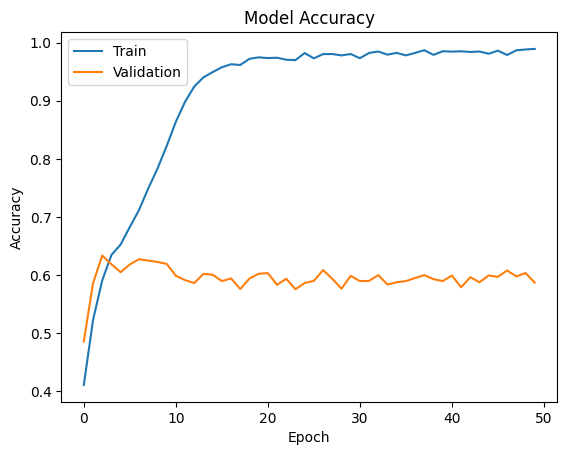

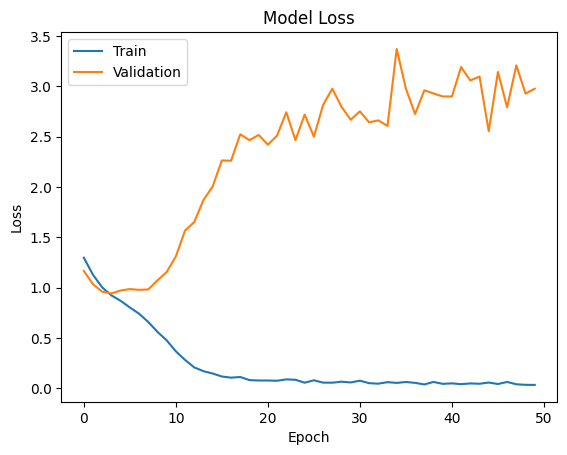

In [13]:
model.plot_training_history()